In [1]:
### Task to predict whether person has ckd or notckd??

## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
### rename column names to make it more user-friendly

In [6]:
columns=pd.read_csv('data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']

In [7]:
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood_pressure
3,sg,specific_gravity
4,al,albumin
5,su,sugar
6,rbc,red_blood_cells
7,pc,pus_cell
8,pcc,pus_cell_clumps
9,ba,bacteria


In [8]:
df.columns=columns['abb_col_names'].values
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7    pus_cell                335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to 
change to numerical dtype.

In [10]:
features=['red_blood_cell_count','packed_cell_volume','white_blood_cell_count']

In [11]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [12]:
for feature in features:
    convert_dtype(df,feature)

In [13]:
df.drop(["id"],axis=1,inplace=True) 

# Extract Numerical & Categorical Features

In [14]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [15]:
cat_col,num_col=extract_cat_num(df)

In [16]:
cat_col

['red_blood_cells',
 ' pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'ypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'classification']

In [17]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [18]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values 


 pus_cell has ['normal' 'abnormal' nan] values 


pus_cell_clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary_artery_disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal_edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


classification has ['ckd' 'ckd\t' 'notckd'] values 




## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

In [19]:
#Replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [20]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values  


 pus_cell has ['normal' 'abnormal' nan] values  


pus_cell_clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes_mellitus has ['yes' 'no' nan] values  


coronary_artery_disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal_edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


classification has ['ckd' 'notckd'] values  




# Checking features distribution

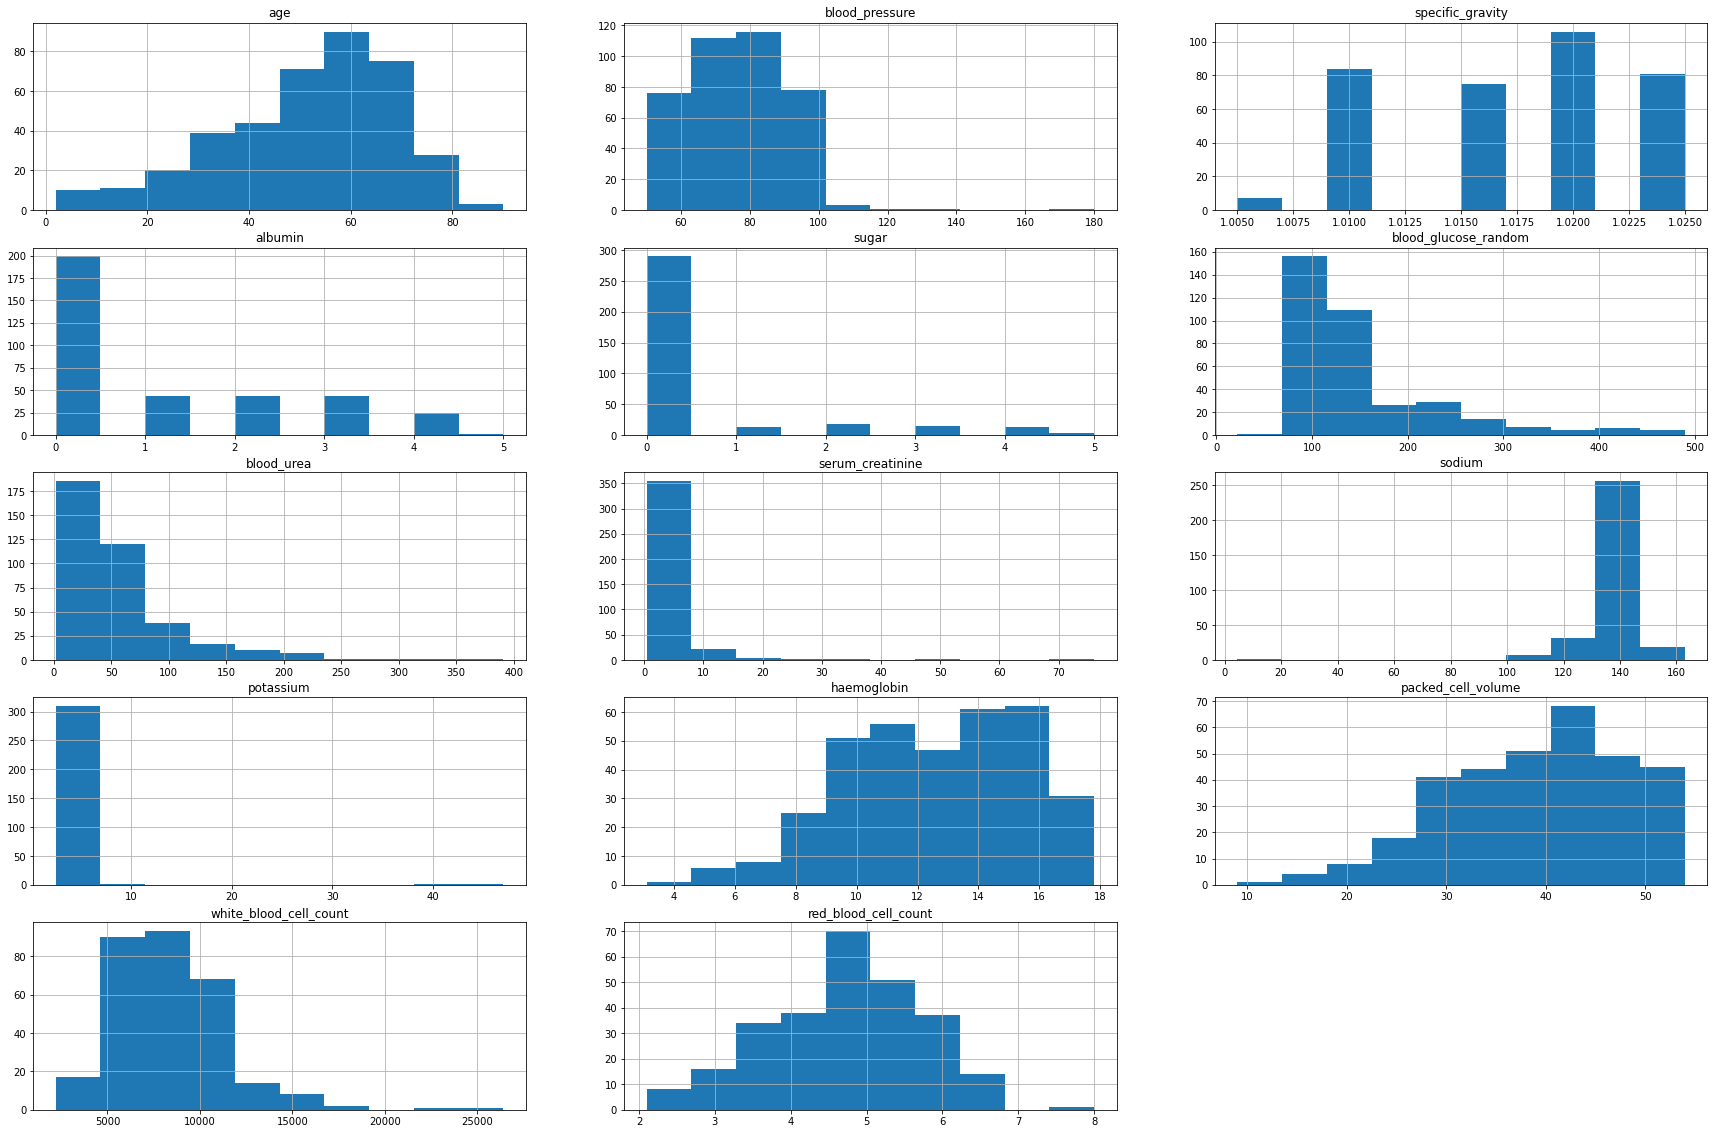

In [21]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

C:\Users\sampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sampa\anaconda3\lib\si

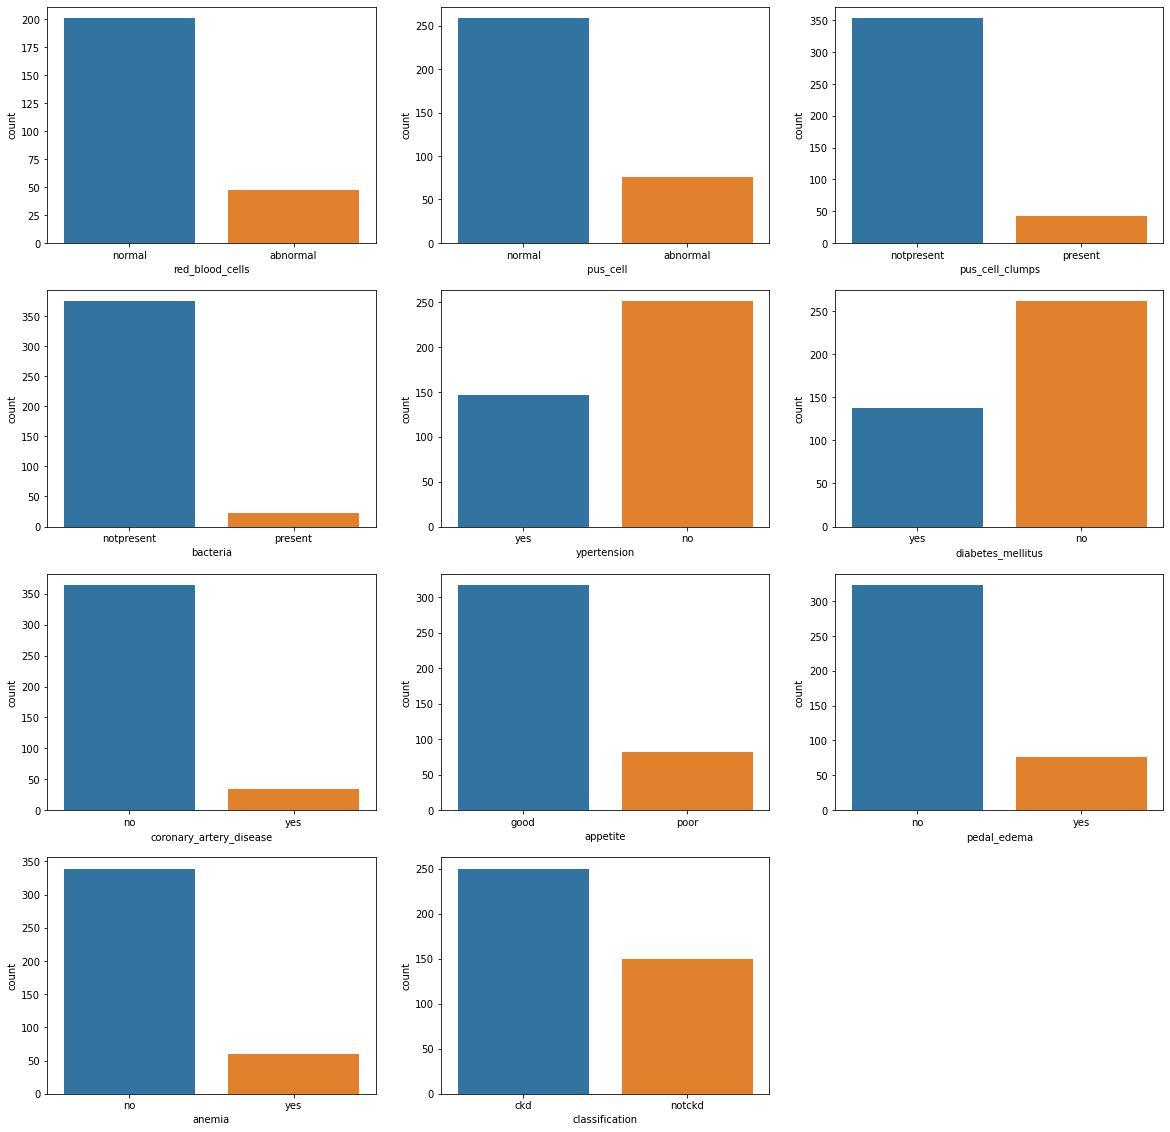

In [22]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

Text(0.5, 1.0, 'target Class')

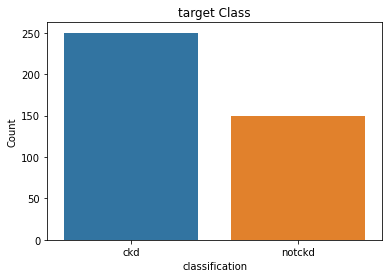

In [23]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

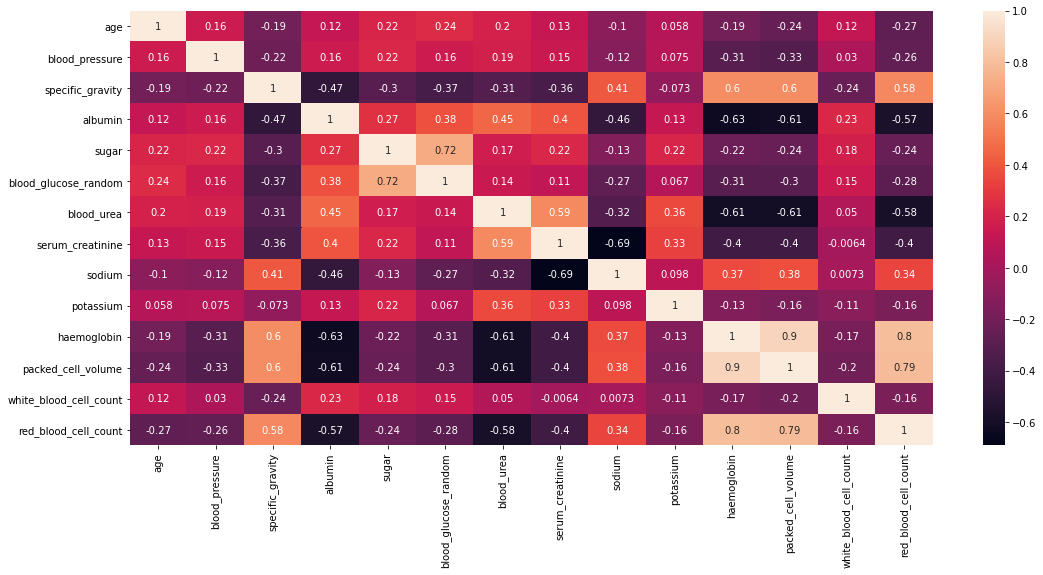

In [24]:
plt.figure(figsize=(18,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

Positive Correlation:

Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin

Sugar -> Blood glucose random

Blood Urea -> Serum creatinine

Hemoglobin -> Red Blood cell count <- packed cell volume


Negative Correlation:

Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin

Serum creatinine -> Sodium

In [25]:
df.groupby(['red_blood_cells','classification'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells classification                                   
abnormal        ckd                25  3.832000     3.7  2.5  5.6
normal          ckd                40  3.782500     3.8  2.1  8.0
                notckd            134  5.368657     5.3  4.4  6.5

In [26]:
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
 pus_cell                   65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
ypertension                  2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

C:\Users\sampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


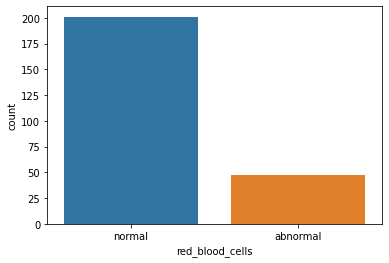

In [27]:
sns.countplot(df['red_blood_cells'])

In [28]:
data=df.copy()

In [29]:
# filling missing with Random value

In [30]:
data['red_blood_cells'].isnull().sum()

152

In [48]:
data['red_blood_cells'].dropna().sample()

43    abnormal
Name: red_blood_cells, dtype: object

In [49]:
random_sample=data['red_blood_cells'].dropna().sample(data['red_blood_cells'].isnull().sum())
random_sample

257    normal
380    normal
198    normal
287    normal
157    normal
        ...  
289    normal
348    normal
83     normal
130    normal
285    normal
Name: red_blood_cells, Length: 152, dtype: object

In [50]:
random_sample.index

Int64Index([257, 380, 198, 287, 157, 328, 103, 361, 338, 386,
            ...
            173, 263, 154, 355,  43, 289, 348,  83, 130, 285],
           dtype='int64', length=152)

In [51]:
data[data['red_blood_cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [52]:
random_sample.index=data[data['red_blood_cells'].isnull()].index

In [53]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [54]:
data.loc[data['red_blood_cells'].isnull(),'red_blood_cells']=random_sample

In [55]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [56]:
data['red_blood_cells'].value_counts()/len(data)

normal      0.8025
abnormal    0.1975
Name: red_blood_cells, dtype: float64

In [57]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample


In [59]:
Random_value_imputation(' pus_cell')
Random_value_imputation('red_blood_cells')

In [60]:
data[cat_col].isnull().sum()

red_blood_cells            0
 pus_cell                  0
pus_cell_clumps            4
bacteria                   4
ypertension                2
diabetes_mellitus          2
coronary_artery_disease    2
appetite                   1
pedal_edema                1
anemia                     1
classification             0
dtype: int64

In [62]:
### as rest of the features has less missing values,so I can fill it using mode concept ###

In [69]:
from statistics import mode
data['pus_cell_clumps']=data['pus_cell_clumps'].fillna(mode)

In [70]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [71]:
for col in cat_col:
    impute_mode(col)

In [72]:
data[cat_col].isnull().sum()

red_blood_cells            0
 pus_cell                  0
pus_cell_clumps            0
bacteria                   0
ypertension                0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [73]:
data[num_col].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [74]:
### lets fill missing values in Numerical features using Random value Imputation

In [75]:
for col in num_col:
    Random_value_imputation(col)

In [76]:
data[num_col].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64